In [32]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

In [33]:
Point = namedtuple('Point', ['x', 'y'])

# Create Lines

In [34]:
geraden = [ 
    (Point(0,0),Point(10,10)),
    (Point(10,0),Point(0,10)),
    (Point(11,1),Point(-3,12)),
    (Point(9,0),Point(-1,11)),
    (Point(2,0),Point(10,12)),
]

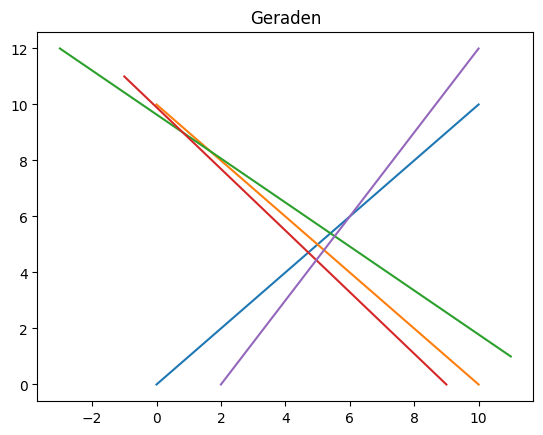

In [35]:
for gerade in geraden:
    plt.plot([gerade[0].x, gerade[1].x], [gerade[0].y, gerade[1].y])

plt.title('Geraden')

plt.show()

# Create HNFs and Cartesian Formulas

In [36]:
hesse_normal_forms = []
for gerade in geraden:
    normal_vector = np.cross([gerade[0].x, gerade[0].y, 1], [gerade[1].x, gerade[1].y, 1])
    cos_a, sin_a, r = normal_vector / np.linalg.norm(normal_vector)
    hesse_normal_forms.append(np.array([cos_a, sin_a, r]))
    
hesse_normal_forms

[array([-0.70710678,  0.70710678,  0.        ]),
 array([-0.09901475, -0.09901475,  0.99014754]),
 array([-0.08078196, -0.10281341,  0.99141499]),
 array([-0.1098792 , -0.09989018,  0.98891279]),
 array([-0.42857143,  0.28571429,  0.85714286])]

In [37]:
cartesian_forms = []
for gerade in geraden:
    m = (gerade[1].y - gerade[0].y) / (gerade[1].x - gerade[0].x)
    b = gerade[0].y - m * gerade[0].x
    cartesian_forms.append(np.array([m, b]))
    
cartesian_forms

[array([1., 0.]),
 array([-1., 10.]),
 array([-0.78571429,  9.64285714]),
 array([-1.1,  9.9]),
 array([ 1.5, -3. ])]

# Linear Optimization using HNF

In [38]:
A = np.array([hnf[0:2] for hnf in hesse_normal_forms]) 
b = -np.array([hnf[2] for hnf in hesse_normal_forms]) 

p_hnf = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, b))
p_hnf

array([5.16460838, 5.09545968])

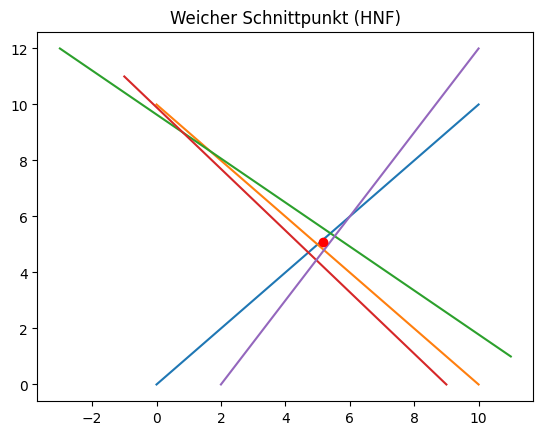

In [39]:
for gerade in geraden:
    plt.plot([gerade[0].x, gerade[1].x], [gerade[0].y, gerade[1].y])
plt.plot(p_hnf[0], p_hnf[1], 'ro')

plt.title('Weicher Schnittpunkt (HNF)')

plt.show()

# Linear Optimization using Cartesian Formula

In [40]:
A = np.array(list([-cart[0], 1] for cart in cartesian_forms))
b = np.array([cart[1] for cart in cartesian_forms])

p_cart = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, b))
p_cart

array([5.11260343, 4.91417059])

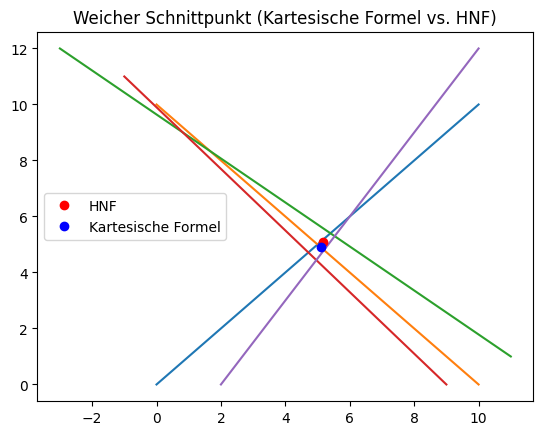

In [41]:
for gerade in geraden:
    plt.plot([gerade[0].x, gerade[1].x], [gerade[0].y, gerade[1].y])
    
plt.plot(p_hnf[0], p_hnf[1], 'ro', label='HNF')
plt.plot(p_cart[0], p_cart[1], 'bo', label='Kartesische Formel')
    
plt.title('Weicher Schnittpunkt (Kartesische Formel vs. HNF)')
plt.legend()

plt.show()

# RANSAC

In [42]:
geraden_with_outlier = [ 
    (Point(0,0),Point(10,10)),
    (Point(-11,10),Point(-10,1)),
    (Point(10,0),Point(0,10)),
    (Point(-8,10),Point(-11,1)),
    (Point(11,1),Point(-3,12)),
    (Point(9,0),Point(-1,11)),
    (Point(2,0),Point(10,12)),
]

In [43]:
hesse_normal_forms = []
for gerade in geraden_with_outlier:
    normal_vector = np.cross([gerade[0].x, gerade[0].y, 1], [gerade[1].x, gerade[1].y, 1])
    cos_a, sin_a, r = normal_vector / np.linalg.norm(normal_vector)
    hesse_normal_forms.append(np.array([cos_a, sin_a, r]))
    
hesse_normal_forms

[array([-0.70710678,  0.70710678,  0.        ]),
 array([0.1006042 , 0.01117824, 0.99486373]),
 array([-0.09901475, -0.09901475,  0.99014754]),
 array([ 0.08785611, -0.02928537,  0.9957026 ]),
 array([-0.08078196, -0.10281341,  0.99141499]),
 array([-0.1098792 , -0.09989018,  0.98891279]),
 array([-0.42857143,  0.28571429,  0.85714286])]

In [44]:
cartesian_forms = []
for gerade in geraden_with_outlier:
    m = (gerade[1].y - gerade[0].y) / (gerade[1].x - gerade[0].x)
    b = gerade[0].y - m * gerade[0].x
    cartesian_forms.append(np.array([m, b]))
    
cartesian_forms

[array([1., 0.]),
 array([ -9., -89.]),
 array([-1., 10.]),
 array([ 3., 34.]),
 array([-0.78571429,  9.64285714]),
 array([-1.1,  9.9]),
 array([ 1.5, -3. ])]

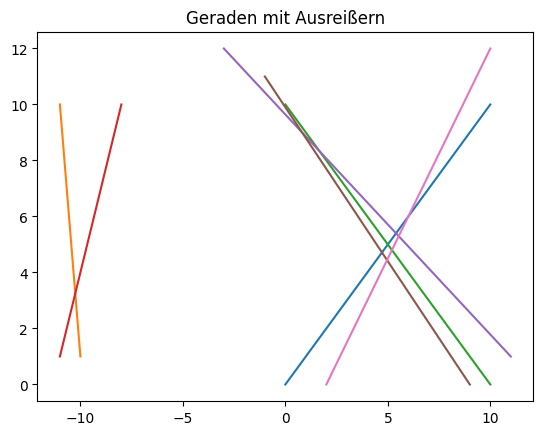

In [45]:
for gerade in geraden_with_outlier:
    plt.plot([gerade[0].x,gerade[1].x], [gerade[0].y,gerade[1].y])
    
plt.title('Geraden mit Ausreißern')
    
plt.show()

In [46]:
intersection_points = []
for i in range(len(cartesian_forms)):
    for j in range(i + 1, len(cartesian_forms)):
        A = np.array([
            [-cartesian_forms[i][0], 1],
            [-cartesian_forms[j][0], 1]
        ])
        b =np.array([cartesian_forms[i][1], cartesian_forms[j][1]])
        
        intersection_points.append(np.linalg.solve(A, b))
        
intersection_points = np.array(intersection_points)
intersection_points

array([[ -8.9       ,  -8.9       ],
       [  5.        ,   5.        ],
       [-17.        , -17.        ],
       [  5.4       ,   5.4       ],
       [  4.71428571,   4.71428571],
       [  6.        ,   6.        ],
       [-12.375     ,  22.375     ],
       [-10.25      ,   3.25      ],
       [-12.00869565,  19.07826087],
       [-12.51898734,  23.67088608],
       [ -8.19047619, -15.28571429],
       [ -6.        ,  16.        ],
       [  1.66666667,   8.33333333],
       [ -1.        ,  11.        ],
       [  5.2       ,   4.8       ],
       [ -6.43396226,  14.69811321],
       [ -5.87804878,  16.36585366],
       [-24.66666667, -40.        ],
       [  0.81818182,   9.        ],
       [  5.53125   ,   5.296875  ],
       [  4.96153846,   4.44230769]])

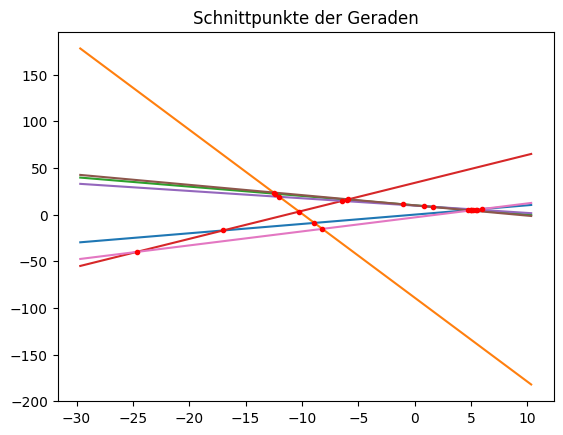

In [47]:
x_vals = np.arange(np.min(intersection_points[:, 0]) - 5, np.max(intersection_points[:, 0]) + 5)

for cartesian_form in cartesian_forms:
    plt.plot(x_vals, cartesian_form[0] * x_vals + cartesian_form[1])
for intersection_point in intersection_points:
    plt.plot(intersection_point[0], intersection_point[1], 'r.')
    
plt.title('Schnittpunkte der Geraden')
    
plt.show()

In [48]:
n = 3
probability = 10**-6
outlier_probability = 0.6
threshold = 2.0
k = int(np.ceil(np.log(probability) / np.log(1 - (1 - outlier_probability) ** n)))
k

209

In [57]:
# RANSAC Algorithm to find close points
best_points_set = []
for _ in range(k):
    # Get n random Intersection-Points
    r = np.random.permutation(np.arange(len(intersection_points)))
    xsel = intersection_points[:, 0][r[0:n]]
    ysel = intersection_points[:, 1][r[0:n]]
    
    # Calculate Average Value in x and y direction
    A = np.tile(np.array([[1, 0], [0, 1]]), (n, 1))
    b = np.array(list([xsel[i], ysel[i]] for i in range(n))).flatten()
    p = np.linalg.lstsq(A, b, rcond=None)[0]
    
    # Check which other Points are close to the Average Value
    err_x = np.abs(intersection_points[:, 0] - p[0])
    err_y = np.abs(intersection_points[:, 1] - p[1])
    similar_points = np.where((err_x < threshold) & (err_y < threshold))[0]
    
    # If there are more close points already stored in best_positions_set -> Update the Set
    if len(similar_points) > len(best_points_set):
        best_points_set = similar_points
        
best_intersection_points = intersection_points[best_points_set]
best_intersection_points

array([[5.        , 5.        ],
       [5.4       , 5.4       ],
       [4.71428571, 4.71428571],
       [6.        , 6.        ],
       [5.2       , 4.8       ],
       [5.53125   , 5.296875  ],
       [4.96153846, 4.44230769]])

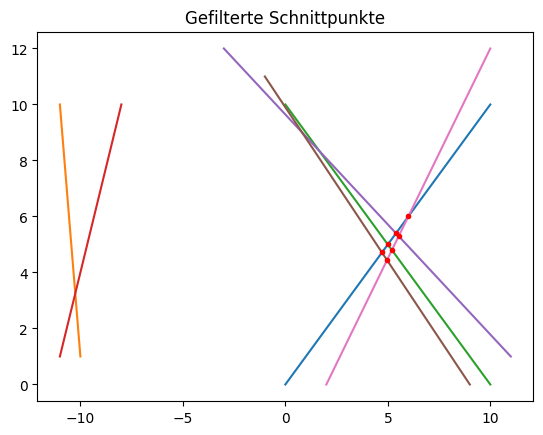

In [50]:
x_vals = np.arange(np.min(intersection_points[:, 0]) - 5, np.max(intersection_points[:, 0]) + 5)

for gerade in geraden_with_outlier:
    plt.plot([gerade[0].x, gerade[1].x], [gerade[0].y, gerade[1].y])
for intersection_point in best_intersection_points:
    plt.plot(intersection_point[0], intersection_point[1], 'r.')
    
plt.title('Gefilterte Schnittpunkte')

plt.show()

In [51]:
# Determine Lines which go through the intersection points determined by the RANSAC Algorithm
cartesian_forms_through_intersection_points = set()
for intersection_point in best_intersection_points:
    for cartesian_form in cartesian_forms:
        y = cartesian_form[0] * intersection_point[0] + cartesian_form[1]
        
        if y == intersection_point[1]:
            cartesian_forms_through_intersection_points.add((cartesian_form[0], cartesian_form[1]))

cartesian_forms_through_intersection_points

{(-1.1, 9.9),
 (-1.0, 10.0),
 (-0.7857142857142857, 9.642857142857142),
 (1.0, 0.0),
 (1.5, -3.0)}

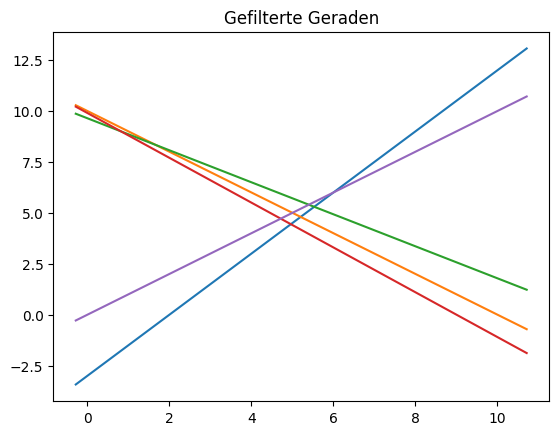

In [52]:
x_vals = np.arange(np.min(best_intersection_points[:, 0]) - 5, np.max(best_intersection_points[:, 0]) + 5)

for cartesian_form in cartesian_forms_through_intersection_points:
    plt.plot(x_vals, cartesian_form[0] * x_vals + cartesian_form[1])
    
plt.title('Gefilterte Geraden')

plt.show()

In [53]:
filtered_hesse_normal_forms = []
for cartesian_form in cartesian_forms_through_intersection_points:
    points = [(x, cartesian_form[0] * x + cartesian_form[1]) for x in [0, 1]]
    normal_vector = np.cross([points[0][0], points[0][1], 1], [points[1][0], points[1][1], 1])
    cos_a, sin_a, r = normal_vector / np.linalg.norm(normal_vector)
    filtered_hesse_normal_forms.append(np.array([cos_a, sin_a, r]))
    
filtered_hesse_normal_forms = np.array(filtered_hesse_normal_forms)
filtered_hesse_normal_forms

array([[-0.42857143,  0.28571429,  0.85714286],
       [ 0.09901475,  0.09901475, -0.99014754],
       [ 0.08078196,  0.10281341, -0.99141499],
       [ 0.1098792 ,  0.09989018, -0.98891279],
       [-0.70710678,  0.70710678,  0.        ]])

In [54]:
A = np.array([hnf[0:2] for hnf in hesse_normal_forms]) 
b = -np.array([hnf[2] for hnf in hesse_normal_forms]) 

p_hnf = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, b))
p_hnf

array([3.51181956, 3.52508887])

In [55]:
A = np.array([hnf[0:2] for hnf in filtered_hesse_normal_forms]) 
b = -np.array([hnf[2] for hnf in filtered_hesse_normal_forms]) 

p_hnf_filtered = np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, b))
p_hnf_filtered

array([5.16460838, 5.09545968])

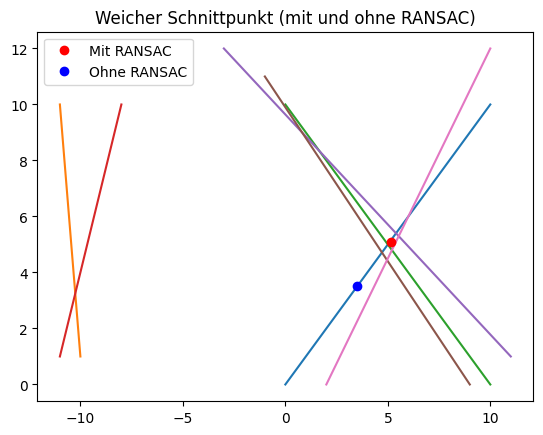

In [56]:
for gerade in geraden_with_outlier:
    plt.plot([gerade[0].x, gerade[1].x], [gerade[0].y, gerade[1].y])
plt.plot(p_hnf_filtered[0], p_hnf_filtered[1], 'ro', label='Mit RANSAC')
plt.plot(p_hnf[0], p_hnf[1], 'bo', label='Ohne RANSAC')

plt.title('Weicher Schnittpunkt (mit und ohne RANSAC)')
plt.legend()

plt.show()